In [1]:
import os
import glob
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
%matplotlib inline
print('ok')

Using TensorFlow backend.


ok


In [2]:
directory = 'Photos'
files = glob.glob(os.path.join(directory, '*'))

In [3]:
print(os.path.join(directory, '*'))

Photos/*


In [4]:
files

['Photos/output', 'Photos/1', 'Photos/2']

In [5]:
fileName = os.listdir(files[1])[3]
print(fileName)
path = os.path.join(files[1], fileName)
print(path)

IMG_1140.jpg
Photos/1/IMG_1140.jpg


In [6]:
img = plt.imread(path)
img.shape

(1512, 2016, 3)

<class 'numpy.ndarray'>


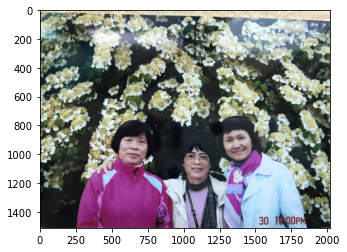

In [7]:
print(type(img))
plt.imshow(img)

In [8]:
img.shape

(1512, 2016, 3)

In [9]:
detector  =  MTCNN()
result = detector.detect_faces(img)

In [10]:
result

[{'box': [548, 831, 197, 242],
  'confidence': 0.9999960660934448,
  'keypoints': {'left_eye': (617, 897),
   'right_eye': (706, 916),
   'nose': (660, 956),
   'mouth_left': (604, 997),
   'mouth_right': (688, 1014)}},
 {'box': [998, 940, 182, 224],
  'confidence': 0.999901294708252,
  'keypoints': {'left_eye': (1054, 1014),
   'right_eye': (1134, 1019),
   'nose': (1093, 1062),
   'mouth_left': (1052, 1100),
   'mouth_right': (1132, 1105)}},
 {'box': [1263, 807, 201, 237],
  'confidence': 0.9995507597923279,
  'keypoints': {'left_eye': (1319, 906),
   'right_eye': (1402, 888),
   'nose': (1368, 952),
   'mouth_left': (1336, 985),
   'mouth_right': (1421, 965)}}]

In [11]:
print(type(result))

<class 'list'>


In [16]:
x = result.count
len(result)

3

In [14]:
faces, box, points = [], [], []

(342, 297, 3)
[[548, 745, 831, 1073], [998, 1180, 940, 1164], [548, 745, 831, 1073]]


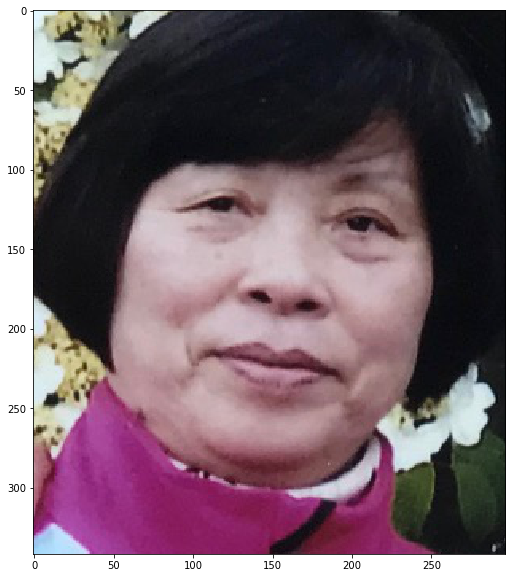

In [21]:
x1, y1, width, height = result[0]['box']
x1,  y1  =  abs(x1),  abs(y1)
x2,  y2  =  x1  +  width,  y1  +  height
keypoints = result[0]['keypoints']
face  =  img[y1-50:y2+50,  x1-50:x2+50]
plt.imshow(face)
print(face.shape)

faces.append(face)
box.append([x1, x2, y1, y2])
points.append(keypoints)
print(box)

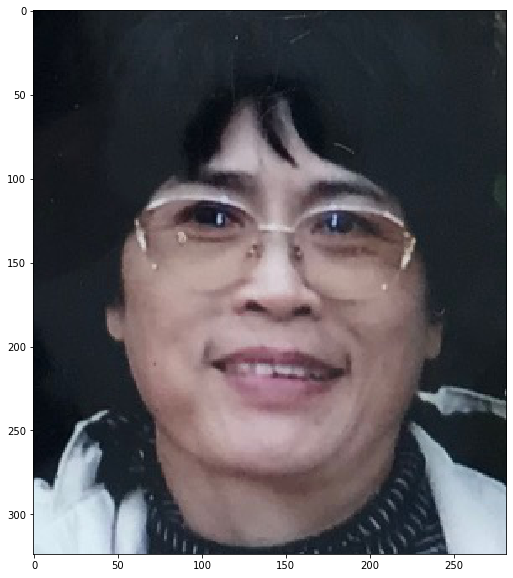

In [29]:
x1, y1, width, height = result[1]['box']
x1,  y1  =  abs(x1),  abs(y1)
x2,  y2  =  x1  +  width,  y1  +  height
keypoints = result[1]['keypoints']
face  =  img[y1-50:y2+50,  x1-50:x2+50]
plt.imshow(face)

faces.append(face)
box.append([x1, x2, y1, y2])
points.append(keypoints)

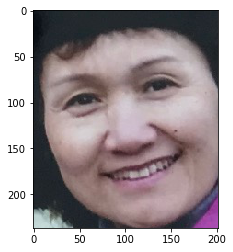

In [93]:
x1, y1, width, height = result[2]['box']
x1,  y1  =  abs(x1),  abs(y1)
x2,  y2  =  x1  +  width,  y1  +  height
keypoints = result[2]['keypoints']
face  =  img[y1:y2,  x1:x2]
plt.imshow(face)

faces.append(face)
box.append([x1, x2, y1, y2])
points.append(keypoints)

In [94]:
size = [img.shape[1], img.shape[0]] # width, height
print(path)
print(size)

Photos/1/IMG_1140.jpg
[2016, 1512]


In [95]:
output = {
        'path': path,
        'faces': faces,
        'box': box,
        'size': size,
        'points': points
    }

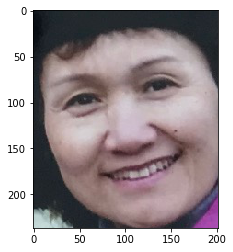

In [101]:
plt.imshow(output['faces'][2])

In [110]:
print(output['path'])
print(output['box'])
print(output['size'])
print(output['points'])

Photos/1/IMG_1140.jpg
[[548, 745, 831, 1073], [998, 1180, 940, 1164], [1263, 1464, 807, 1044]]
[2016, 1512]
[{'left_eye': (617, 897), 'right_eye': (706, 916), 'nose': (660, 956), 'mouth_left': (604, 997), 'mouth_right': (688, 1014)}, {'left_eye': (1054, 1014), 'right_eye': (1134, 1019), 'nose': (1093, 1062), 'mouth_left': (1052, 1100), 'mouth_right': (1132, 1105)}, {'left_eye': (1319, 906), 'right_eye': (1402, 888), 'nose': (1368, 952), 'mouth_left': (1336, 985), 'mouth_right': (1421, 965)}]


In [118]:
x = img.copy()

for i in output['points']:
    le, re, n, ml, mr = i['left_eye'], i['right_eye'], i['nose'], i['mouth_left'], i['mouth_right']
    x[le[1]-5:le[1]+5, le[0]-5:le[0]+5] = [[[255, 0, 0] for i in range(10)] for j in range(10)]
    x[re[1]-5:re[1]+5, re[0]-5:re[0]+5] = [[[255, 0, 0] for i in range(10)] for j in range(10)]
    x[n[1]-5:n[1]+5, n[0]-5:n[0]+5] = [[[255, 0, 0] for i in range(10)] for j in range(10)]
    x[ml[1]-5:ml[1]+5, ml[0]-5:ml[0]+5] = [[[255, 0, 0] for i in range(10)] for j in range(10)]
    x[mr[1]-5:mr[1]+5, mr[0]-5:mr[0]+5] = [[[255, 0, 0] for i in range(10)] for j in range(10)]

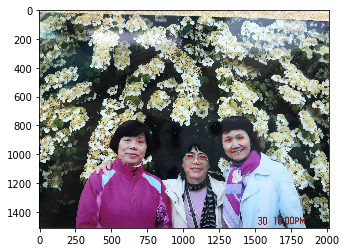

In [119]:
plt.imshow(x)

In [234]:
import faceDetection

In [257]:
class FaceDetection:
    
    def __init__(self, path):
        self.path = path
        
    def face_recognition(self):
        print("processing " + self.path + "...")
        self.faces = []
        img = plt.imread(self.path)
        detector  =  MTCNN()
        result = detector.detect_faces(img)
        
        for i in result:
            x1, y1, width, height = i['box']
            x2,  y2  =  x1 + width, y1 + height
            face  =  img[y1:y2, x1:x2]
            print(face.shape)
            self.faces.append(face)
            
        return self.faces

In [258]:
x = FaceDetection("Photos/1/IMG_1141.jpg")

In [259]:
r = x.face_recognition()

processing Photos/1/IMG_1141.jpg...
(242, 186, 3)
(235, 190, 3)


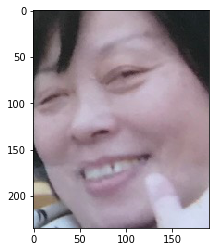

In [256]:
plt.imshow(r[1])

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [23]:
mean_filename='./models/mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

In [24]:
age_net_pretrained='./models/age_net.caffemodel'
age_net_model_file='./age_net_definitions/deploy.prototxt'
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(1, 3, 227, 227)


In [25]:
gender_net_pretrained='./models/gender_net.caffemodel'
gender_net_model_file='./gender_net_definitions/deploy.prototxt'
gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(10, 3, 227, 227)


In [26]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

predicted age: (38, 43)
predicted gender: Female


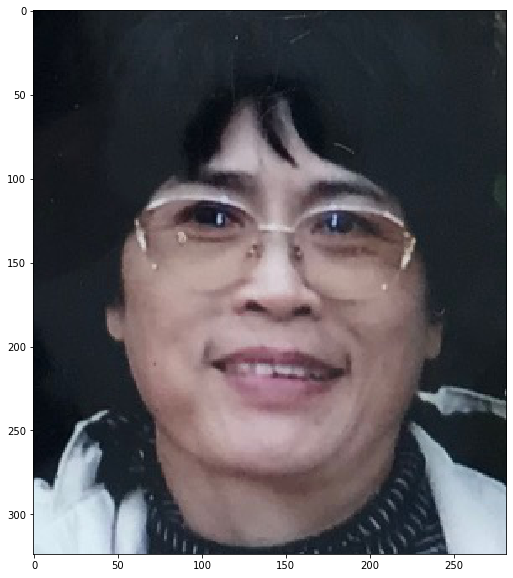

In [30]:
prediction = age_net.predict([face]) 
print('predicted age:', age_list[prediction[0].argmax()])
prediction = gender_net.predict([face]) 
print('predicted gender:', gender_list[prediction[0].argmax()])
_ = plt.imshow(face)

predicted age: (0, 2)
predicted gender: Female


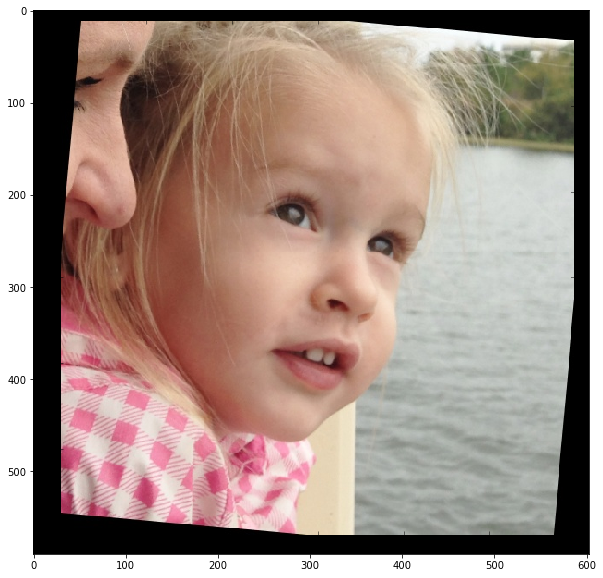

In [6]:
example_image = './download.png'
input_image = caffe.io.load_image(example_image)
prediction = age_net.predict([input_image]) 
print('predicted age:', age_list[prediction[0].argmax()])
prediction = gender_net.predict([input_image]) 
print('predicted gender:', gender_list[prediction[0].argmax()])
_ = plt.imshow(input_image)

predicted age for ./f1.png : (48, 53)
predicted gender for ./f1.png : Female


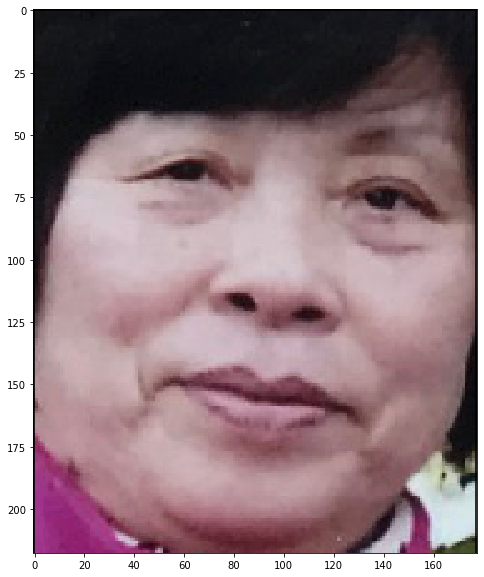

In [7]:
example_image = './f1.png'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)
prediction = age_net.predict([input_image]) 
print('predicted age for', example_image,':', age_list[prediction[0].argmax()])
prediction = gender_net.predict([input_image]) 
print('predicted gender for', example_image,':', gender_list[prediction[0].argmax()])

predicted age for ./f2.png : (48, 53)
predicted gender for ./f2.png : Male


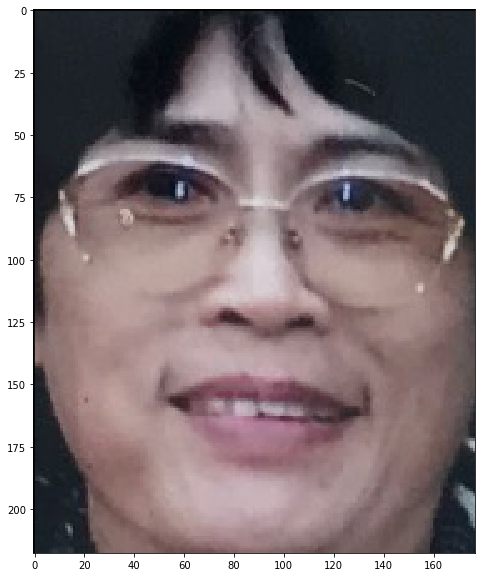

In [8]:
example_image = './f2.png'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)
prediction = age_net.predict([input_image]) 
print('predicted age for', example_image,':', age_list[prediction[0].argmax()])
prediction = gender_net.predict([input_image]) 
print('predicted gender for', example_image,':', gender_list[prediction[0].argmax()])

predicted age for ./f3.png : (38, 43)
predicted gender for ./f3.png : Female


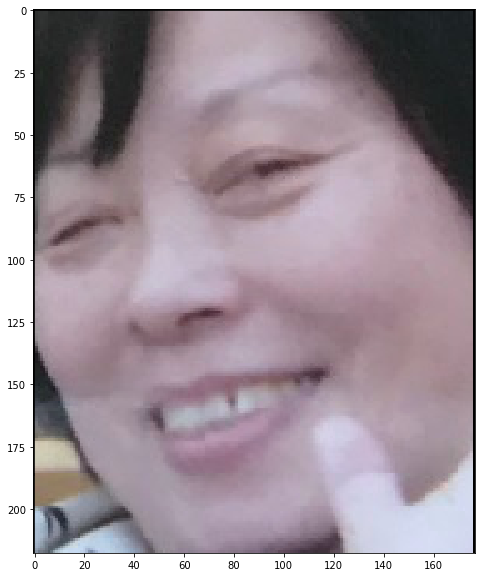

In [9]:
example_image = './f3.png'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)
prediction = age_net.predict([input_image]) 
print('predicted age for', example_image,':', age_list[prediction[0].argmax()])
prediction = gender_net.predict([input_image]) 
print('predicted gender for', example_image,':', gender_list[prediction[0].argmax()])

predicted age for ./f4.jpg : (25, 32)
predicted gender for ./f4.jpg : Female


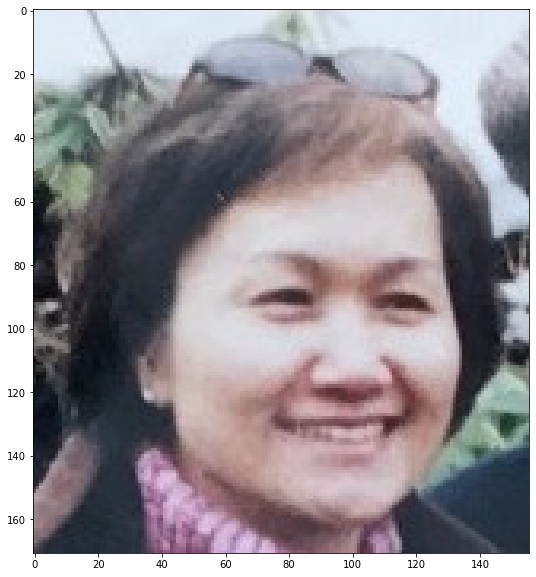

In [10]:
example_image = './f4.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)
prediction = age_net.predict([input_image]) 
print('predicted age for', example_image,':', age_list[prediction[0].argmax()])
prediction = gender_net.predict([input_image]) 
print('predicted gender for', example_image,':', gender_list[prediction[0].argmax()])

predicted age for ./f5.jpg : (48, 53)
predicted gender for ./f5.jpg : Male


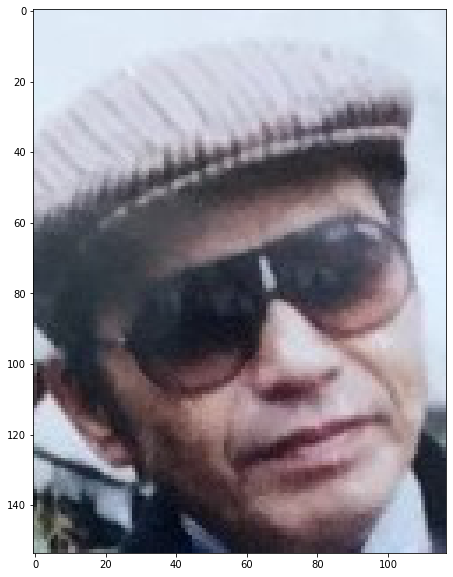

In [11]:
example_image = './f5.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)
prediction = age_net.predict([input_image]) 
print('predicted age for', example_image,':', age_list[prediction[0].argmax()])
prediction = gender_net.predict([input_image]) 
print('predicted gender for', example_image,':', gender_list[prediction[0].argmax()])

In [57]:
import os
import glob
from mtcnn.mtcnn import MTCNN
import numpy as np
import matplotlib.pyplot as plt
import caffe
%matplotlib inline

class JustAskDeeper:
    def __init__(self, path=""):
        self.path = path
        self.detector = MTCNN()
        self.faces = []
        plt.rcParams['figure.figsize'] = (10, 10)
        plt.rcParams['image.interpolation'] = 'nearest'
        plt.rcParams['image.cmap'] = 'gray'
        mean_filename='./models/mean.binaryproto'
        proto_data = open(mean_filename, "rb").read()
        a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
        mean  = caffe.io.blobproto_to_array(a)[0]
        age_net_pretrained='./models/age_net.caffemodel'
        age_net_model_file='./age_net_definitions/deploy.prototxt'
        self.age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))
        gender_net_pretrained='./models/gender_net.caffemodel'
        gender_net_model_file='./gender_net_definitions/deploy.prototxt'
        self.gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                            mean=mean,
                            channel_swap=(2,1,0),
                            raw_scale=255,
                            image_dims=(256, 256))
        self.age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
        self.gender_list=['Male','Female']

    def set_path(self, path):
        self.path = path
        self.faces.clear()

    def detect_faces(self):
        self.img = plt.imread(self.path)
        self.result = self.detector.detect_faces(self.img)

        for i in range(len(self.result)):
            x1, y1, width, height = self.result[i]['box']
            x1,  y1  =  abs(x1),  abs(y1)
            x2,  y2  =  x1  +  width,  y1  +  height
            keypoints = self.result[i]['keypoints']
            face  =  self.img[y1-50:y2+50,  x1-50:x2+50]
            self.faces.append(face)

    def age_prediction(self):
        for i in range(len(self.result)):
            prediction = self.age_net.predict([self.faces[i]]) 
            print('predicted age:', self.age_list[prediction[0].argmax()])

    def gender_prediction(self):
        for i in range(len(self.result)):
            prediction = self.gender_net.predict([self.faces[i]]) 
            print('predicted gender:', self.gender_list[prediction[0].argmax()])

In [64]:
import justAskDeeper

test = JustAskDeeper(path="Photos/1/IMG_1140.jpg")

(1, 3, 227, 227)
(10, 3, 227, 227)


In [59]:
test.detect_faces()

In [60]:
test.age_prediction()

predicted age: (25, 32)
predicted age: (38, 43)
predicted age: (25, 32)


In [61]:
test.gender_prediction()

predicted gender: Female
predicted gender: Female
predicted gender: Female


In [62]:
test.set_path("Photos/1/IMG_1146.jpg")
test.detect_faces()
test.age_prediction()
test.gender_prediction()

predicted age: (60, 100)
predicted age: (60, 100)
predicted gender: Female
predicted gender: Male
